## New York City Airbnb Open Data

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
airbnb = pd.read_csv('AB_NYC_2019.csv')

### Data Preprocessing

In [243]:
# Find out the number of missing values for each variable
missing = airbnb.isnull().sum()

# Deal with the missing values
airbnb.drop(['host_name', 'last_review'], axis = 1, inplace = True)
airbnb['name'].fillna("#", inplace = True)
airbnb['reviews_per_month'].fillna(0, inplace = True)


### Impact of Airbnb on Local Housing Availability

In [244]:
# This function finds out the number of rooms of each room type and their percentage
room_number = airbnb.groupby("room_type").size()
room_percentage = round(room_number/len(airbnb),4)
room = pd.concat([room_number, room_percentage], axis = 1)
room.columns = ['number','percentage']
print(room)

                 number  percentage
room_type                          
Entire home/apt   25409      0.5197
Private room      22326      0.4566
Shared room        1160      0.0237


In [239]:
# This function finds out the listings count on average
# and the number of listings of each listings count and their percentage.
# Repetitive records of hosts and calculated host listings count are removed.
host_unique = airbnb.drop_duplicates('host_id')
listings_mean = host_unique.calculated_host_listings_count.mean()
listings_number = host_unique.groupby("calculated_host_listings_count").size().sort_values(ascending=False)
listings_percentage = listings_number/len(host_unique)
listings = pd.concat([listings_number, listings_percentage], axis = 1)
listings.columns = ['number','percentage']
print(listings)
print(f"The listings count on average is {listings_mean:.2f}")

# This function finds out the number of hosts who own more than one listing
listings_extreme = host_unique[host_unique.calculated_host_listings_count > 1]
listings_extreme_group = listings_extreme.groupby("calculated_host_listings_count").size()
print(f"{len(listings_extreme)} hosts own more than one listing.")
print(listings_extreme_group)

                                number  percentage
calculated_host_listings_count                    
1                                32303    0.862402
2                                 3329    0.088875
3                                  951    0.025389
4                                  360    0.009611
5                                  169    0.004512
6                                   95    0.002536
7                                   57    0.001522
8                                   52    0.001388
9                                   26    0.000694
10                                  21    0.000561
12                                  15    0.000400
13                                  10    0.000267
11                                  10    0.000267
14                                   5    0.000133
15                                   5    0.000133
17                                   4    0.000107
18                                   3    0.000080
33                             

In [245]:
# This function finds out the number of days available for each listing on average 
# and the number of listings of each number of days available and their percentage.
# Listings available for 0 days are removed because they are not in use.
availability = airbnb.loc[airbnb.availability_365 > 0]
availability_mean = availability.availability_365.mean()
availability_number = availability.groupby("availability_365").size().sort_values(ascending=False)
availability_percentage = availability_number/len(airbnb)
availabilities = pd.concat([availability_number, availability_percentage], axis = 1)
availabilities.columns = ['number','percentage']

more_than_half_year = len(availability.loc[availability.availability_365 > 180])/len(availability)

print(f"Listings on average are available for {availability_mean:.2f} days per year.")
print(f"{more_than_half_year*100:.2f}% of listings are available for more than half of the year.")
print(availabilities.head())


Listings on average are available for 175.83 days per year.
45.80% of listings are available for more than half of the year.
                  number  percentage
availability_365                    
365                 1295    0.026485
364                  491    0.010042
1                    408    0.008344
89                   361    0.007383
5                    340    0.006954


[1.259294147199196, 1.3151884968583858, 1.4232133806386214, 1.4645669291338583, 1.3892445582586428]
[164.36133768352366, 178.89121616638394, 190.42903676128432, 225.01510574018127, 197.85886214442013]


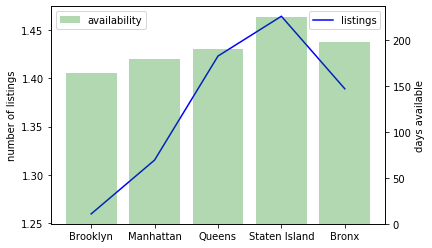

In [241]:
# This part first calculates the average number of listings per host for each borough
# Then this part calculates the average days available per listing for each borough
# Finally this part plots the distributions.
boroughs = airbnb.neighbourhood_group.unique()
boroughs_listings = []
for borough in boroughs:
    borough_listings_mean = host_unique.loc[host_unique.neighbourhood_group == borough].calculated_host_listings_count.mean()
    boroughs_listings.append(borough_listings_mean)
print(boroughs_listings)

boroughs_availability = []
for borough in boroughs:
    borough_availability_mean = availability.loc[availability.neighbourhood_group == borough].availability_365.mean()
    boroughs_availability.append(borough_availability_mean)
print(boroughs_availability)

fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.plot(boroughs, boroughs_listings, color = 'blue', label = 'listings')
ax1.legend(loc=1)
ax1.set_ylabel('number of listings')
ax2 = ax1.twinx() 
plt.bar(boroughs, boroughs_availability ,alpha=0.3, color = 'green', label = 'availability')  
ax2.set_ylabel('days available')
ax2.legend(loc=2)




### Airbnb and Tax Revenue

In [247]:
# This function returns the expected annual tax revenue from Airbnb based on tax rates.
def tax_revenue(tax_rate):
    airbnb['revenue'] = airbnb.price * airbnb.minimum_nights * airbnb.number_of_reviews * tax_rate
    total_revenue = airbnb.revenue.sum()
    print(f"The annual tax revenue from Airbnb would be {total_revenue} if the tax rate is {tax_rate}.")

tax_revenue(0.05)
tax_revenue(0.07)
tax_revenue(0.1)
    

The annual tax revenue from Airbnb would be 32505460.35 if the tax rate is 0.05.
The annual tax revenue from Airbnb would be 45507644.49000001 if the tax rate is 0.07.
The annual tax revenue from Airbnb would be 65010920.7 if the tax rate is 0.1.


[124.38320732192598, 196.8758136743456, 99.51764913519237, 114.81233243967829, 87.4967919340055]
[486574, 454569, 156950, 11541, 28371]


(0, 600000)

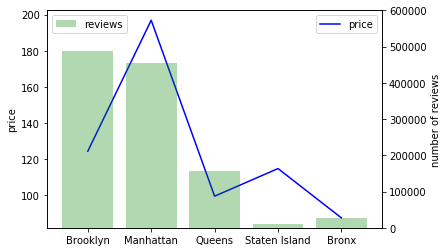

In [246]:
# This part first calculates the average price per listing for each borough,
# then calculates the total number of reviews for each borough
# finally plots them in a graph.
boroughs_price = []
for borough in boroughs:
    borough_price_mean = airbnb.loc[airbnb.neighbourhood_group == borough].price.mean()
    boroughs_price.append(borough_price_mean)
print(boroughs_price)

boroughs_reviews = []
for borough in boroughs:
    borough_reviews_sum = airbnb.loc[airbnb.neighbourhood_group == borough].number_of_reviews.sum()
    boroughs_reviews.append(borough_reviews_sum)
print(boroughs_reviews)

fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.plot(boroughs, boroughs_price, color = 'blue', label = 'price')
ax1.legend(loc=1)
ax1.set_ylabel('price')
ax2 = ax1.twinx() 
plt.bar(boroughs, boroughs_reviews,alpha=0.3, color = 'green', label = 'reviews')  
ax2.set_ylabel('number of reviews')
ax2.legend(loc=2)
plt.ylim(0, 600000)

In [214]:
# This function returns the expected annual tax revenue from Airbnb of each borough based on tax rates.
def borough_tax_revenue(borough, tax_rate):
    airbnb_borough = airbnb.loc[airbnb.neighbourhood_group == borough]
    airbnb_borough['revenue'] = airbnb_borough.price * airbnb_borough.minimum_nights * airbnb_borough.number_of_reviews * tax_rate
    total_revenue = round(airbnb_borough.revenue.sum(), 2)
    return(total_revenue)

borough_revenue = pd.DataFrame()
for borough in boroughs:
    for tax_rate in (0.05, 0.07, 0.1):
        borough_revenue.loc[tax_rate, borough] = borough_tax_revenue(borough, tax_rate)
        
print(borough_revenue)
        


         Brooklyn    Manhattan      Queens  Staten Island      Bronx
0.05  12232693.95  17845267.35  2027261.95      129227.65  271009.45
0.07  17125771.53  24983374.29  2838166.73      180918.71  379413.23
0.10  24465387.90  35690534.70  4054523.90      258455.30  542018.90


/Users/yunxin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Geographical Distribution of Airbnb

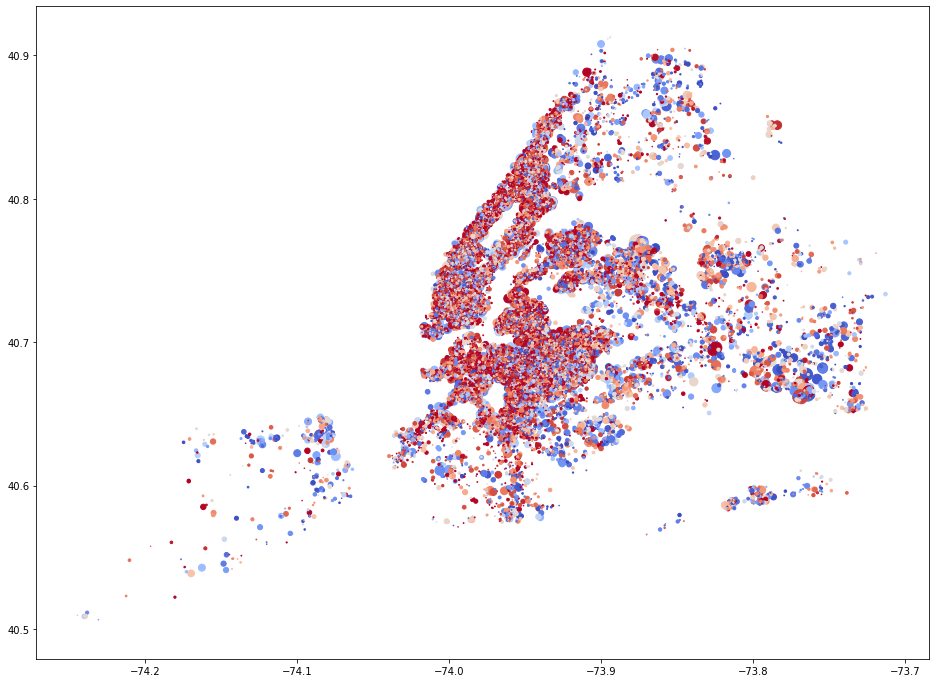

In [163]:
# This part produces visualization of the geographical distribution of Airbnb in New York City. 
# The color of each bubble represents the number of days available for booking 
# The size of each bubble represents the total number of reviews for each listing.
size = airbnb.number_of_reviews/3
color = airbnb.availability_365
plt.figure(figsize=(16,12))
plt.scatter(airbnb.longitude, airbnb.latitude, 
            s=size, c=255*color, cmap="coolwarm_r")

plt.savefig('NY_Airbnb.png', transparent=True)